In [1]:
%load_ext autoreload
%autoreload 2

# load environment variables
import os
from dotenv import load_dotenv, find_dotenv
dotenv_path = find_dotenv()
load_dotenv(dotenv_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine

from src.functions.io import ModuleFileReader
from src import queries
scripts = ModuleFileReader(queries)

In [2]:
engine = create_engine(os.environ.get("DATABASE_URL"))

# Company Analysis

metrics for each company

In [3]:
companies = pd.read_sql_query(scripts.read("companies.sql"), engine)

In [4]:
company_nums = [i for i,x in enumerate(companies.columns)]
[(i,x) for i,x in enumerate(companies.columns)]

[(0, 'id'),
 (1, 'company'),
 (2, 'film_id'),
 (3, 'company_id'),
 (4, 'role'),
 (5, 'id'),
 (6, 'title'),
 (7, 'released'),
 (8, 'runtime'),
 (9, 'rated'),
 (10, 'budget'),
 (11, 'total_gross'),
 (12, 'award_noms'),
 (13, 'award_wins'),
 (14, 'oscar_noms'),
 (15, 'oscar_wins'),
 (16, 'ratings_imdb'),
 (17, 'ratings_meta'),
 (18, 'ratings_tomatoes'),
 (19, 'film_id'),
 (20, 'title'),
 (21, 'budget'),
 (22, 'domestic_gross'),
 (23, 'foreign_gross'),
 (24, 'domestic_pct'),
 (25, 'foreign_pct'),
 (26, 'total_gross'),
 (27, 'roi')]

In [5]:
company_nums.remove(0)
company_nums.remove(5)
company_nums.remove(10)
company_nums.remove(11)
company_nums.remove(19)
company_nums.remove(20)

companies = companies.iloc[:, company_nums]
companies

,company,film_id,company_id,role,title,released,runtime,rated,award_noms,award_wins,...,ratings_imdb,ratings_meta,ratings_tomatoes,budget,domestic_gross,foreign_gross,domestic_pct,foreign_pct,total_gross,roi
0,Blumhouse Productions,1,1,Production,Insidious: The Last Key,2018-01-05,103,PG-13,0,0,...,5.7,49.0,32.0,10000000.0,67745330.0,100140258.0,0.403521,0.596479,167885588.0,15.788559
1,Stage 6 Films,1,2,Production,Insidious: The Last Key,2018-01-05,103,PG-13,0,0,...,5.7,49.0,32.0,10000000.0,67745330.0,100140258.0,0.403521,0.596479,167885588.0,15.788559
2,Universal Pictures,1,3,Distribution,Insidious: The Last Key,2018-01-05,103,PG-13,0,0,...,5.7,49.0,32.0,10000000.0,67745330.0,100140258.0,0.403521,0.596479,167885588.0,15.788559
3,Adastra Films,2,4,Production,The Strange Ones,2017-12-07,81,R,7,0,...,5.0,57.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Archer Gray,2,5,Production,The Strange Ones,2017-12-07,81,R,7,0,...,5.0,57.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Gamechanger Films,2,6,Production,The Strange Ones,2017-12-07,81,R,7,0,...,5.0,57.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Relic Pictures,2,7,Production,The Strange Ones,2017-12-07,81,R,7,0,...,5.0,57.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Stay Gold Features,2,8,Production,The Strange Ones,2017-12-07,81,R,7,0,...,5.0,57.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Storyboard Entertainment,2,9,Production,The Strange Ones,2017-12-07,81,R,7,0,...,5.0,57.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Vertical Entertainment,2,10,Distribution,The Strange Ones,2017-12-07,81,R,7,0,...,5.0,57.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
production = companies[companies.role == 'Production']
distribution = companies[companies.role == 'Distribution']

<BarContainer object of 25 artists>

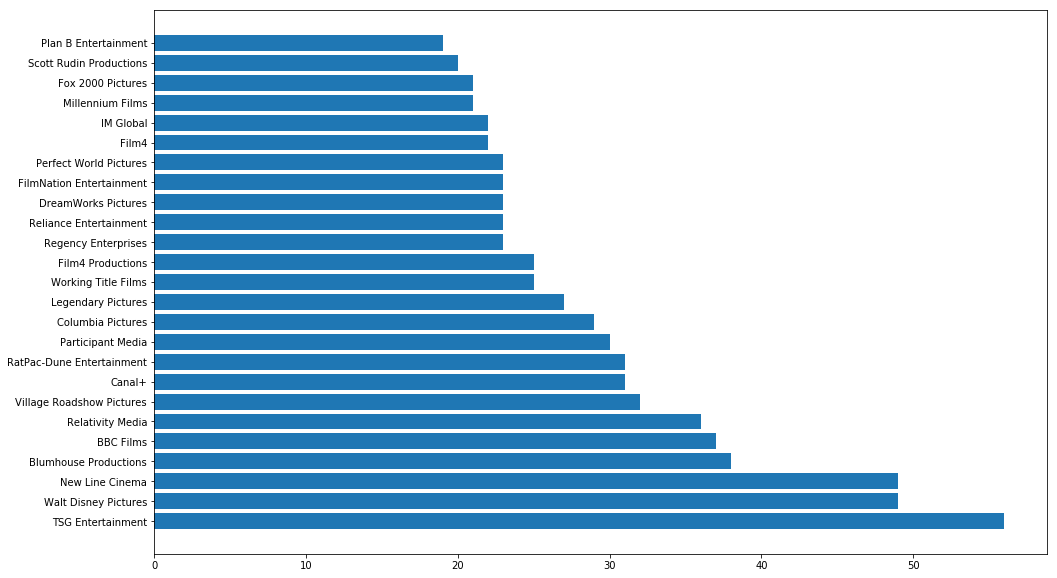

In [7]:
top_producers = production.groupby("company").count()['film_id'].sort_values(ascending=False)
plt.figure(figsize=(16,10))
plt.barh(top_producers[:25].index, top_producers[:25].values)

In [8]:
# producer means for producers with more than 1 film released

producer_means = production.groupby("company").mean()
producer_means = producer_means[production.groupby("company").count()['film_id'] > 1]

<BarContainer object of 25 artists>

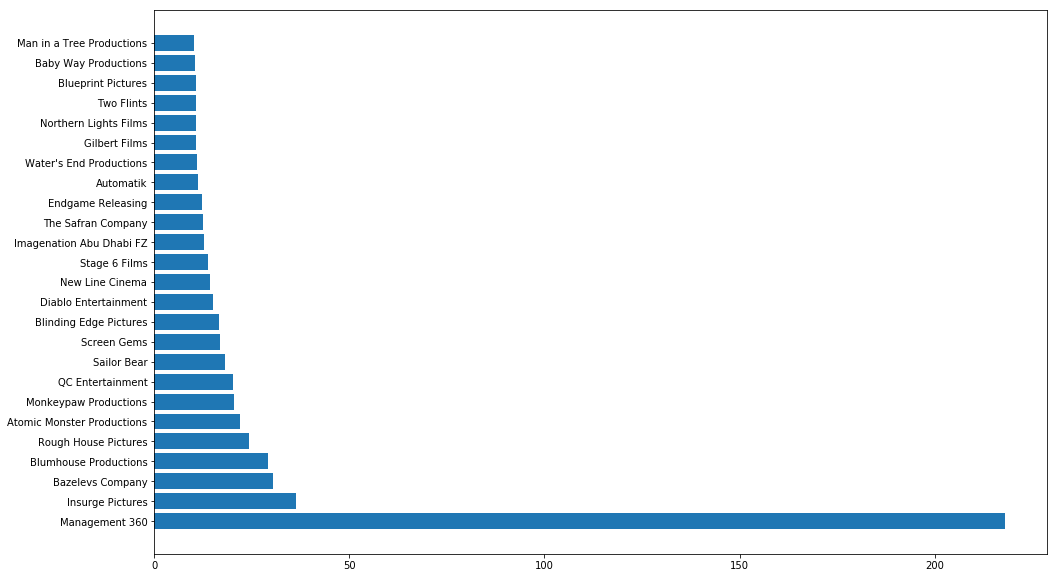

In [9]:
## producer avg. roi

top_producer_roi = producer_means.roi.sort_values(ascending=False)

plt.figure(figsize=(16,10))
plt.barh(top_producer_roi[:25].index, top_producer_roi[:25].values)

In [10]:
companies[companies.company == 'Rough House Pictures']

,company,film_id,company_id,role,title,released,runtime,rated,award_noms,award_wins,...,ratings_imdb,ratings_meta,ratings_tomatoes,budget,domestic_gross,foreign_gross,domestic_pct,foreign_pct,total_gross,roi
222,Rough House Pictures,60,207,Production,Flower,2018-03-16,90,R,0,0,...,5.9,45.0,NaN,NaN,328188.0,NaN,NaN,NaN,NaN,NaN
260,Rough House Pictures,72,207,Production,Gemini,2018-03-30,93,R,0,0,...,5.5,71.0,73.0,NaN,200340.0,0.0,1.000000,0.00000,200340.0,NaN
821,Rough House Pictures,212,207,Production,Halloween,2018-10-19,91,R,2,0,...,7.8,81.0,95.0,10000000.0,159342015.0,94346020.0,0.628073,0.37188,253700000.0,24.37
1287,Rough House Pictures,324,207,Production,Donald Cried,2017-03-03,85,NOT RATED,7,0,...,6.5,72.0,94.0,NaN,61406.0,0.0,1.000000,0.00000,61406.0,NaN
4425,Rough House Pictures,1184,207,Production,Camp X-Ray,2014-10-17,117,R,0,0,...,6.9,54.0,75.0,1000000.0,13302.0,NaN,NaN,NaN,NaN,NaN


In [11]:
top_producer_roi.index

Index(['Management 360', 'Insurge Pictures', 'Bazelevs Company',
       'Blumhouse Productions', 'Rough House Pictures',
       'Atomic Monster Productions', 'Monkeypaw Productions',
       'QC Entertainment', 'Sailor Bear', 'Screen Gems',
       ...
       'Toho', 'UTV Motion Pictures', 'Unbroken Pictures', 'United King Films',
       'Vinod Chopra Films', 'Warp Films', 'Washington Square Films',
       'Werc Werk Works', 'WestEnd Films', 'Wigwam Films'],
      dtype='object', name='company', length=771)

In [12]:
lowest_budget = producer_means.budget.sort_values(ascending=True)

In [13]:
lowest_budget

company
Sailor Bear                          1.000000e+05
Diablo Entertainment                 2.500000e+05
Vertigo Films                        5.000000e+05
Creative England                     6.500000e+05
Sundial Pictures                     1.000000e+06
Bersin Pictures                      1.000000e+06
Sirena Film                          1.000000e+06
Burn Later Productions               1.000000e+06
Buffalo Films                        1.400000e+06
Roadside Attractions                 1.700000e+06
Dark Trick Films                     2.000000e+06
Northern Lights Films                2.000000e+06
Dragonfly Entertainment              2.000000e+06
Caviar                               2.000000e+06
Two Flints                           2.000000e+06
CG Cinéma                           2.100000e+06
PT. Merantau Films                   2.233333e+06
10 West Studios                      2.300000e+06
Cinereach                            2.333333e+06
Rooks Nest Entertainment             2.500

<BarContainer object of 25 artists>

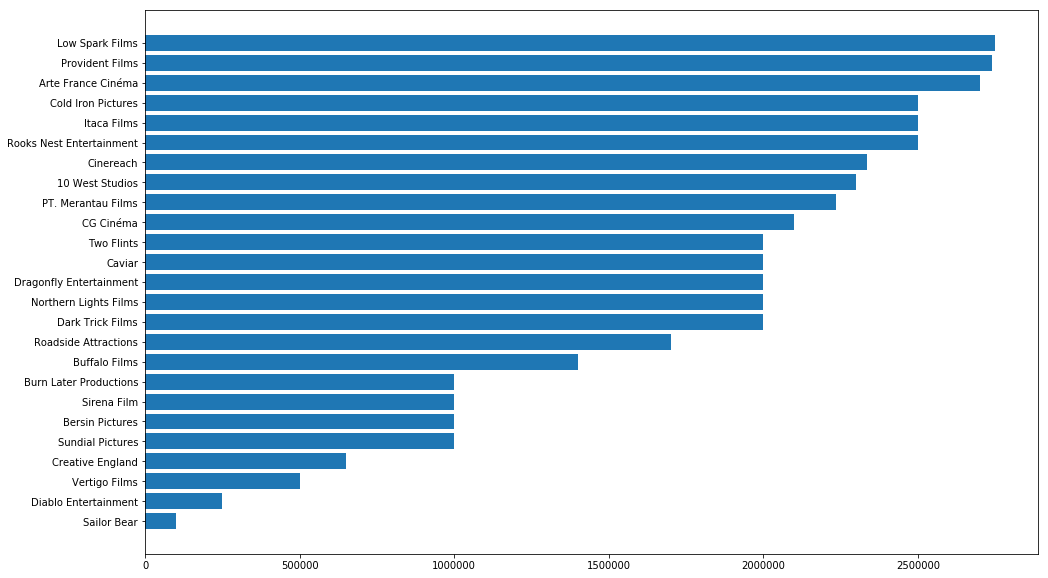

In [14]:
plt.figure(figsize=(16,10))

plt.barh(lowest_budget[:25].index, lowest_budget[:25].values)

In [22]:
lowest_budget_roi = producer_means.sort_values(by='budget', ascending=True)['roi']

<BarContainer object of 25 artists>

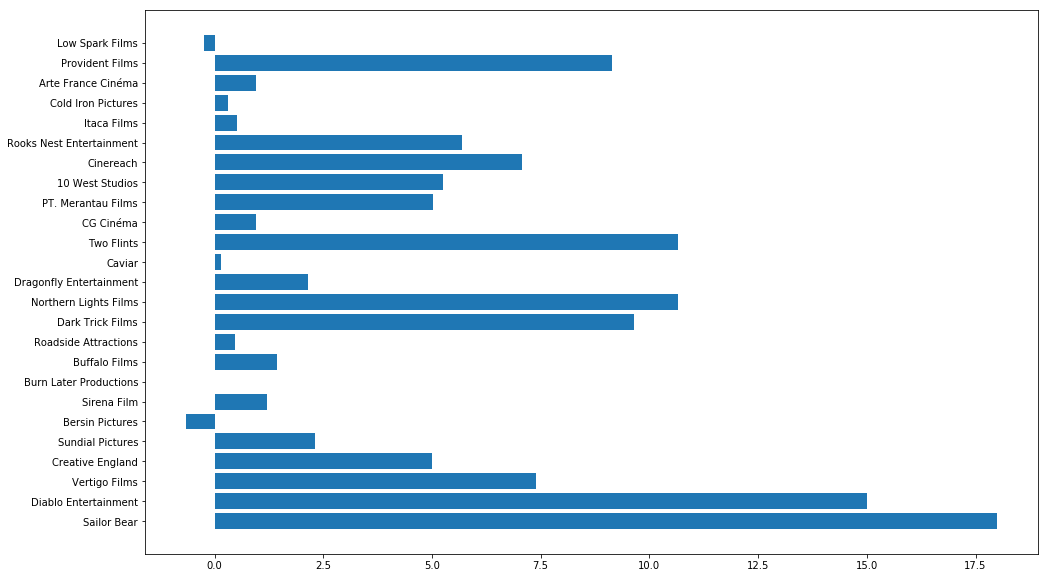

In [23]:
plt.figure(figsize=(16,10))

plt.barh(lowest_budget_roi[:25].index, lowest_budget_roi[:25].values)

- Many of these low budget producers have ROIs that are well above the average of 3X